In [2]:
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing data
df=pd.read_csv('pewdata.csv')

In [4]:
df.head()

,Unnamed: 0,QKEY,Device_Type_W43,LANG_W43,FORM_W43,RACESURV1a_W43,RACESURV1b_W43,RACESURV1c_W43,RACESURV1d_W43,ADMISSIONa_W43,...,F_PARTY_FINAL,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_INCOME,F_INCOME_RECODE,F_REG,F_IDEO,F_ACSWEB,F_VOLSUM,WEIGHT_W43
0,0,16.0,1,9,1,2,2.0,3,2,2,...,NaN,2.0,2,NaN,NaN,1.0,NaN,1,1,0.116641
1,1,17.0,3,9,1,1,NaN,3,3,3,...,2.0,NaN,2,NaN,NaN,1.0,NaN,1,1,0.321249
2,2,18.0,1,9,2,1,1.0,3,3,3,...,1.0,NaN,1,NaN,NaN,1.0,NaN,1,2,0.800690
3,3,19.0,1,9,2,1,NaN,1,3,1,...,2.0,NaN,2,NaN,NaN,3.0,NaN,1,2,2.896003
4,4,20.0,3,9,2,1,3.0,1,2,3,...,2.0,NaN,2,NaN,NaN,3.0,NaN,1,2,0.186655


In [5]:
#creating a subset of variables I want to examine
final_df=df[["F_SEX", "F_AGECAT", "F_EDUCCAT", "F_PARTY_FINAL", "F_RACETHNMOD", "F_CREGION", "F_MARITAL","RACESURV10_W43","RACESURV11_W43", "RACESURV6_W43","RACESURV7_W43","RACESURV20_W43","RACESURV21_W43","RACESURV22_W43"]]

In [6]:
#dropping missing data
final_df.dropna(inplace=True)

In [7]:
#changing column names
final_df.rename({"F_SEX":"Gender","F_AGECAT":"Age","F_EDUCCAT":"Education","F_PARTY_FINAL":"Party","F_RACETHNMOD":"Race","F_CREGION":"Region","F_MARITAL":"Marital","RACESURV10_W43":"RACESURV10","RACESURV11_W43":"RACESURV11", "RACESURV6_W43":"RACESURV6","RACESURV7_W43":"RACESURV7","RACESURV20_W43":"RACESURV20","RACESURV21_W43":"RACESURV21","RACESURV22_W43":"RACESURV22"}, axis=1, inplace=True)

In [8]:
final_df.head()

,Gender,Age,Education,Party,Race,Region,Marital,RACESURV10,RACESURV11,RACESURV6,RACESURV7,RACESURV20,RACESURV21,RACESURV22
1,2.0,4.0,3.0,2.0,3.0,1,1.0,2.0,2.0,2.0,1.0,2.0,3.0,2.0
5,1.0,2.0,1.0,2.0,2.0,3,6.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0
7,2.0,2.0,1.0,2.0,3.0,2,3.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0
8,2.0,1.0,1.0,3.0,3.0,1,6.0,2.0,3.0,1.0,2.0,3.0,3.0,2.0
9,1.0,4.0,3.0,3.0,2.0,3,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [9]:
final_df.shape

(2729, 14)

In [10]:
final_df.describe()

,Gender,Age,Education,Party,Race,Region,Marital,RACESURV10,RACESURV11,RACESURV6,RACESURV7,RACESURV20,RACESURV21,RACESURV22
count,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000
mean,1.558813,2.585196,1.899597,2.018688,1.896665,2.715280,2.735801,1.637963,2.106632,1.655918,2.349212,2.390253,3.057530,3.323195
std,0.496620,0.981956,0.826275,0.714853,1.059944,0.993338,2.062132,0.480678,0.633258,0.475155,0.891101,0.619035,1.097846,0.906748
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000
50%,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,4.000000
75%,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,2.000000,3.000000,2.000000,3.000000,3.000000,4.000000,4.000000
max,2.000000,4.000000,3.000000,3.000000,5.000000,4.000000,6.000000,2.000000,3.000000,2.000000,4.000000,3.000000,4.000000,4.000000


In [11]:
final_df.Gender.value_counts()

2.0    1525
1.0    1204
Name: Gender, dtype: int64

In [12]:
final_df.Age.value_counts()

2.0    919
3.0    826
4.0    585
1.0    399
Name: Age, dtype: int64

In [13]:
final_df.Education.value_counts()

1.0    1082
2.0     839
3.0     808
Name: Education, dtype: int64

In [14]:
final_df.Party.value_counts()

2.0    1334
3.0     723
1.0     672
Name: Party, dtype: int64

In [15]:
final_df.Race.value_counts()

1.0    1295
2.0     683
3.0     620
5.0     131
Name: Race, dtype: int64

In [16]:
final_df.Region.value_counts()

3    1148
4     624
2     513
1     444
Name: Region, dtype: int64

In [17]:
final_df.Marital.value_counts()

1.0    1356
6.0     608
3.0     329
2.0     211
5.0     153
4.0      72
Name: Marital, dtype: int64

In [18]:
#crosstab of education and race
pd.crosstab(final_df.Education, final_df.Race)

Race,1.0,2.0,3.0,5.0
Education,,,,
1.0,516,247,211,108
2.0,337,266,216,20
3.0,442,170,193,3


In [20]:
#crosstab of political party and race
pd.crosstab(final_df.Party, final_df.Race)

Race,1.0,2.0,3.0,5.0
Party,,,,
1.0,487,29,135,21
2.0,408,512,346,68
3.0,400,142,139,42


In [40]:
#crosstab of gender and race
pd.crosstab(final_df.Gender, final_df.Race)

Race,1.0,2.0,3.0,5.0
Gender,,,,
1.0,601,250,276,77
2.0,694,433,344,54


In [43]:
#crosstab of age and race
pd.crosstab(final_df.Age, final_df.Race)

Race,1.0,2.0,3.0,5.0
Age,,,,
1.0,141,89,140,29
2.0,357,251,250,61
3.0,407,224,162,33
4.0,390,119,68,8


In [44]:
#crosstab of age and political party
pd.crosstab(final_df.Age, final_df.Party)

Party,1.0,2.0,3.0
Age,,,
1.0,75,202,122
2.0,185,475,259
3.0,222,405,199
4.0,190,252,143


In [52]:
#crosstab of question "Thinking about your own experience, have you ever personally experienced discrimination or been treated unfairly because of your race or ethnicity?" and political party
pd.crosstab(final_df.RACESURV20, final_df.Party)

Party,1.0,2.0,3.0
RACESURV20,,,
0,400,530,333
1,272,804,390


In [46]:
#crosstab of gender and political party
pd.crosstab(final_df.Gender, final_df.Party)

Party,1.0,2.0,3.0
Gender,,,
1.0,317,497,390
2.0,355,837,333


In [48]:
#crosstab of question "How often, if ever, does race or race relations come up in your conversations with family and friends?" and race
pd.crosstab(final_df.RACESURV7, final_df.Race)

Race,1.0,2.0,3.0,5.0
RACESURV7,,,,
1.0,120,227,133,20
2.0,487,270,230,62
3.0,531,146,189,41
4.0,157,40,68,8


In [49]:
#crosstab of question "When it comes to racial discrimination, which do you think is the bigger problem for the country today?" and race
pd.crosstab(final_df.RACESURV6, final_df.Race)

Race,1.0,2.0,3.0,5.0
RACESURV6,,,,
1.0,658,74,178,29
2.0,637,609,442,102


In [24]:
#recoding question RACESURV20: "Thinking about your own experiences, have you ever personally experienced discrimination or been treated unfairly because of your race or ethnicity?"
#Yes=1, No=0
def sub(s):
    if s==3:
        return 0
    else:
        return 1
final_df['RACESURV20']=final_df['RACESURV20'].apply(sub)

#recoding question RACESURV10: "Do you think race relations in the United States are:"
#1.Generally good #2.Generally bad
#I recode because binary outcomes must be coded as 0 or 1
def subs(r):
    if r==1:
        return 1
    else:
        return 0
final_df['RACESURV10']=final_df['RACESURV10'].apply(subs)

In [25]:
final_df.head()

,Gender,Age,Education,Party,Race,Region,Marital,RACESURV10,RACESURV11,RACESURV6,RACESURV7,RACESURV20,RACESURV21,RACESURV22
1,2.0,4.0,3.0,2.0,3.0,1,1.0,0,2.0,2.0,1.0,1,3.0,2.0
5,1.0,2.0,1.0,2.0,2.0,3,6.0,0,3.0,2.0,2.0,1,2.0,3.0
7,2.0,2.0,1.0,2.0,3.0,2,3.0,0,2.0,2.0,2.0,0,4.0,4.0
8,2.0,1.0,1.0,3.0,3.0,1,6.0,0,3.0,1.0,2.0,0,3.0,2.0
9,1.0,4.0,3.0,3.0,2.0,3,1.0,0,2.0,2.0,2.0,1,2.0,2.0


In [26]:
final_df.describe()

,Gender,Age,Education,Party,Race,Region,Marital,RACESURV10,RACESURV11,RACESURV6,RACESURV7,RACESURV20,RACESURV21,RACESURV22
count,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000
mean,1.558813,2.585196,1.899597,2.018688,1.896665,2.715280,2.735801,0.362037,2.106632,1.655918,2.349212,0.537193,3.057530,3.323195
std,0.496620,0.981956,0.826275,0.714853,1.059944,0.993338,2.062132,0.480678,0.633258,0.475155,0.891101,0.498706,1.097846,0.906748
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,2.000000,0.000000,2.000000,3.000000
50%,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,1.000000,4.000000,4.000000
75%,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,1.000000,3.000000,2.000000,3.000000,1.000000,4.000000,4.000000
max,2.000000,4.000000,3.000000,3.000000,5.000000,4.000000,6.000000,1.000000,3.000000,2.000000,4.000000,1.000000,4.000000,4.000000


In [28]:
#performing binary logistic regression
logit=sm.formula.logit(formula='RACESURV10~Gender+Race+Education+Party+Region+Marital+Age+RACESURV20+RACESURV21+RACESURV22+RACESURV7+RACESURV6', data=final_df).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.602966
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             RACESURV10   No. Observations:                 2729
Model:                          Logit   Df Residuals:                     2716
Method:                           MLE   Df Model:                           12
Date:                Mon, 06 Dec 2021   Pseudo R-squ.:                 0.07885
Time:                        18:03:43   Log-Likelihood:                -1645.5
converged:                       True   LL-Null:                       -1786.4
Covariance Type:            nonrobust   LLR p-value:                 3.210e-53
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4184      0.407      1.029      0.303      -0.378       1.215
Gender        -0.2979      0.

In [34]:
#odds ratios
np.exp(logit.params)

Intercept     1.519583
Gender        0.742407
Race          1.107299
Education     1.051377
Party         0.873527
Region        1.042508
Marital       0.967566
Age           0.982983
RACESURV20    0.810643
RACESURV21    1.090023
RACESURV22    0.901377
RACESURV7     1.508755
RACESURV6     0.443299
dtype: float64

In [73]:
#predicted probabilites 
def logit2prob (logit):
    odds = np.exp(logit)
    prob = odds / (1 + odds) 
    return(prob);

intercept = logit.params.Intercept
gender = logit.params.Gender
race = logit.params.Race
education = logit.params.Education
party = logit.params.Party
region = logit.params.Region
marital = logit.params.Marital
age = logit.params.Age
conversation = logit.params.RACESURV7
problem = logit.params.RACESURV6
discrimination = logit.params.RACESURV20

In [76]:
#white person, republican, 50-64 age group, no discrimination
logits_evolv=intercept +(1*race)+(1*party)+(3*age)+(0*discrimination)
logit2prob(logits_evolv)

0.5308920684867756

In [79]:
#black person, democrat, 50-64 age group, discrimination
logits_evolv=intercept +(2*race)+(2*party)+(3*age)+(1*discrimination)
logit2prob(logits_evolv)

0.5225927925929155

In [82]:
#black person, democrat, 30-49 age group, disrimination
logits_evolv=intercept +(2*race)+(2*party)+(2*age)+(1*discrimination)
logit2prob(logits_evolv)

0.5268730155315394

In [69]:
#checking  for multicollinearity by estimating the variance inflation factor (VIF)
VIFtable=PrettyTable(["Variable","Odds Ratio"])
VIFtable.add_row(["Intercept","1.52"])
VIFtable.add_row(["Gender",".74"])
VIFtable.add_row(["Race","1.07"])
VIFtable.add_row(["Education","1.05"])
VIFtable.add_row(["Party",".87"])
VIFtable.add_row(["Region","1.04"])
VIFtable.add_row(["Marital",".97"])
VIFtable.add_row(["Age",".98"])
VIFtable.add_row(["RACESURV20",".81"])
VIFtable.add_row(["RACESURV21","1.09"])
VIFtable.add_row(["RACESURV22",".90"])
VIFtable.add_row(["RACESURV7","1.51"])
VIFtable.add_row(["RACESURV6",".44"])

In [70]:
print(VIFtable)

+------------+------------+
|  Variable  | Odds Ratio |
+------------+------------+
| Intercept  |    1.52    |
|   Gender   |    .74     |
|    Race    |    1.07    |
| Education  |    1.05    |
|   Party    |    .87     |
|   Region   |    1.04    |
|  Marital   |    .97     |
|    Age     |    .98     |
| RACESURV20 |    .81     |
| RACESURV21 |    1.09    |
| RACESURV22 |    .90     |
| RACESURV7  |    1.51    |
| RACESURV6  |    .44     |
+------------+------------+


In [29]:
#performing binary logistic regression, dropping variable RACESURV21 because it is collinear
logit1=sm.formula.logit(formula='RACESURV10~Gender+Race+Education+Party+Region+Marital+Age+RACESURV7+RACESURV6+RACESURV20+RACESURV22', data=final_df).fit()
print(logit1.summary())

Optimization terminated successfully.
         Current function value: 0.603431
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             RACESURV10   No. Observations:                 2729
Model:                          Logit   Df Residuals:                     2717
Method:                           MLE   Df Model:                           11
Date:                Mon, 06 Dec 2021   Pseudo R-squ.:                 0.07814
Time:                        18:03:48   Log-Likelihood:                -1646.8
converged:                       True   LL-Null:                       -1786.4
Covariance Type:            nonrobust   LLR p-value:                 2.110e-53
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6017      0.390      1.541      0.123      -0.163       1.367
Gender        -0.3008      0.

In [30]:
#odds ratios
np.exp(logit1.params)

Intercept     1.825249
Gender        0.740235
Race          1.096675
Education     1.047951
Party         0.872594
Region        1.044016
Marital       0.965879
Age           0.983025
RACESURV7     1.531651
RACESURV6     0.437242
RACESURV20    0.767510
RACESURV22    0.937648
dtype: float64

In [66]:
#creating odds ratio table for report
VIFtable=PrettyTable(["Variable","Odds Ratio"])
VIFtable.add_row(["Intercept","1.83"])
VIFtable.add_row(["Gender",".74"])
VIFtable.add_row(["Race","1.10"])
VIFtable.add_row(["Education","1.05"])
VIFtable.add_row(["Party",".87"])
VIFtable.add_row(["Region","1.04"])
VIFtable.add_row(["Marital",".97"])
VIFtable.add_row(["Age",".98"])
VIFtable.add_row(["RACESURV20",".77"])
VIFtable.add_row(["RACESURV22",".94"])
VIFtable.add_row(["RACESURV7","1.53"])
VIFtable.add_row(["RACESURV6",".44"])

In [68]:
print(VIFtable)

+------------+------------+
|  Variable  | Odds Ratio |
+------------+------------+
| Intercept  |    1.83    |
|   Gender   |    .74     |
|    Race    |    1.10    |
| Education  |    1.05    |
|   Party    |    .87     |
|   Region   |    1.04    |
|  Marital   |    .97     |
|    Age     |    .98     |
| RACESURV20 |    .77     |
| RACESURV22 |    .94     |
| RACESURV7  |    1.53    |
| RACESURV6  |    .44     |
+------------+------------+


In [31]:
#predicted probabilites 
def logit2prob (logit):
    odds = np.exp(logit)
    prob = odds / (1 + odds) 
    return(prob);

intercept = logit1.params.Intercept
gender = logit1.params.Gender
race = logit1.params.Race
education = logit1.params.Education
party = logit1.params.Party
region = logit1.params.Region
marital = logit1.params.Marital
age = logit1.params.Age
conversation = logit1.params.RACESURV7
problem = logit1.params.RACESURV6

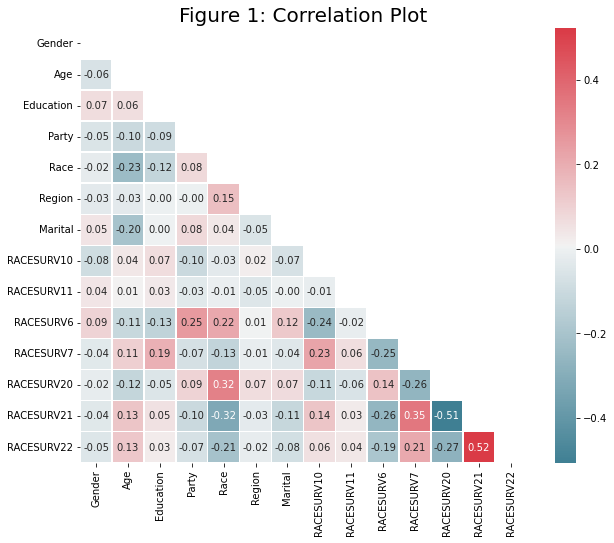

In [33]:
#checking for collinearity by plotting a heatmap of a Pearson correlation coefficient matrix

corr=final_df.corr()
fig, ax=plt.subplots(figsize=(10,8))
colormap=sns.diverging_palette(220,10,as_cmap=True)
dropvals=np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)]=True
sns.heatmap(corr,cmap=colormap,linewidths=.5,annot=True,fmt=".2f",mask=dropvals)
plt.title("Figure 1: Correlation Plot",fontdict = {'fontsize' : 20})
plt.show()

In [38]:
#checking for multicollinearity by estimating the variance inflation factor (VIF
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('RACESURV10 ~ Gender+Race+Education+Party+Region+Marital+Age+RACESURV20+RACESURV21+RACESURV22+RACESURV7+RACESURV6', data=final_df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Variable'] = X.columns

In [39]:
vif

,VIF,Variable
0,95.637369,Intercept
1,1.031526,Gender
2,1.270695,Race
3,1.067192,Education
4,1.090463,Party
5,1.029620,Region
6,1.068421,Marital
7,1.122044,Age
8,1.424722,RACESURV20
9,1.866797,RACESURV21


In [62]:
#creating a table with VIF values for report 
from prettytable import PrettyTable 

In [64]:
VIFtable=PrettyTable(["Variable","VIF"])
VIFtable.add_row(["Intercept","95.63"])
VIFtable.add_row(["Gender","1.03"])
VIFtable.add_row(["Race","1.27"])
VIFtable.add_row(["Education","1.07"])
VIFtable.add_row(["Party","1.09"])
VIFtable.add_row(["Region","1.03"])
VIFtable.add_row(["Marital","1.07"])
VIFtable.add_row(["Age","1.22"])
VIFtable.add_row(["RACESURV20","1.42"])
VIFtable.add_row(["RACESURV21","1.87"])
VIFtable.add_row(["RACESURV22","1.39"])
VIFtable.add_row(["RACESURV7","1.23"])
VIFtable.add_row(["RACESURV6","1.23"])


In [65]:
print(VIFtable)

+------------+-------+
|  Variable  |  VIF  |
+------------+-------+
| Intercept  | 95.63 |
|   Gender   |  1.03 |
|    Race    |  1.27 |
| Education  |  1.07 |
|   Party    |  1.09 |
|   Region   |  1.03 |
|  Marital   |  1.07 |
|    Age     |  1.22 |
| RACESURV20 |  1.42 |
| RACESURV21 |  1.87 |
| RACESURV22 |  1.39 |
| RACESURV7  |  1.23 |
| RACESURV6  |  1.23 |
+------------+-------+
